In [37]:
import pandas as pd

# Import Dataset

In [38]:
A=pd.read_csv("E:/data science class/may 2021/23 may/training_set.csv")

# Data Profiling

In [39]:
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


# Data Preprocessing

# Treating credit history as catgorical

In [40]:
A.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [41]:
A["Credit_History"]=A["Credit_History"].fillna(1.0)

In [42]:
A.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

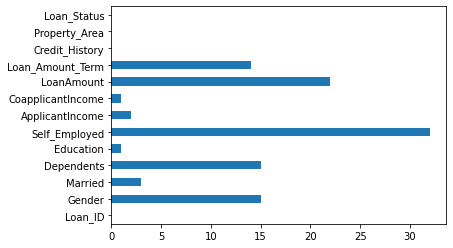

In [43]:
A.isna().sum().plot(kind="barh") #Finding out missing value in Dataset in graphical form

In [44]:
cat=[] #Separating categorical and continous columns from the Dataset
con=[]
for i in A:
    if(A[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [45]:
cat#categorical columns

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [46]:
con#continous columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [48]:
#Treating missing Values of continous columns
for i in con:
        replacer = A[i].mean()
        A[i] = A[i].fillna(replacer)

In [49]:
#Treating missing Values of categorical columns
for i in cat:
    replacer = pd.DataFrame(A[i].value_counts()).index[0]
    A[i] = A[i].fillna(replacer)

In [50]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [51]:
A.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [52]:
dep=[]
for i in A.Dependents:
    dep.append(int(i.replace("3+","3")))
A.Dependents=dep
    

In [53]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [54]:
cat.remove("Loan_ID")
cat.remove("Loan_Status")

In [24]:
#Anova Test
from statsmodels.api import OLS
from statsmodels.formula.api import ols
model = ols("Credit_History ~ Loan_Status ",A).fit()
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(model)
Q = pd.DataFrame(anova_results)
a = Q['PR(>F)']['Loan_Status']
print("%.40f"%a)

0.0000000000000000000000000000000000000000


In [25]:
X=A[con].join(pd.get_dummies(A[cat]))#performing one hot encoding

In [26]:
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849.00000,0.0,146.412162,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
1,1,5405.54085,1508.0,128.000000,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0,3000.00000,0.0,66.000000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0,2583.00000,2358.0,120.000000,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0,6000.00000,0.0,141.000000,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900.00000,0.0,71.000000,360.0,1.0,1,0,1,0,1,0,1,0,1,0,0
610,3,4106.00000,0.0,40.000000,180.0,1.0,0,1,0,1,1,0,1,0,1,0,0
611,1,8072.00000,240.0,253.000000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
612,2,7583.00000,0.0,187.000000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1


In [27]:
import seaborn as sb


In [28]:
con

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

# EDA

C:\Users\BHUSHAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

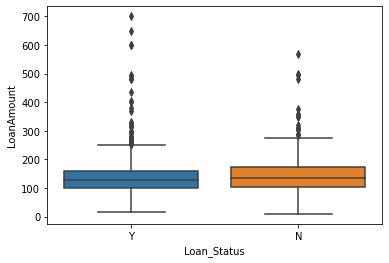

In [29]:
sb.boxplot(A.Loan_Status,A.LoanAmount)

C:\Users\BHUSHAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='Dependents'>

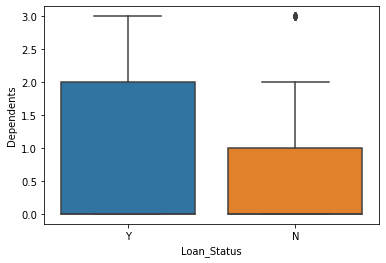

In [30]:
sb.boxplot(A.Loan_Status,A.Dependents)

C:\Users\BHUSHAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

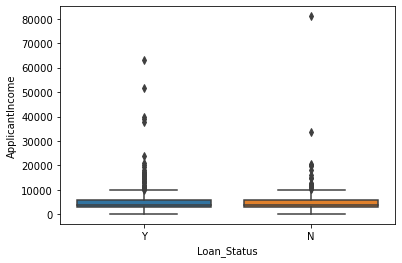

In [31]:
sb.boxplot(A.Loan_Status,A.ApplicantIncome)

C:\Users\BHUSHAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

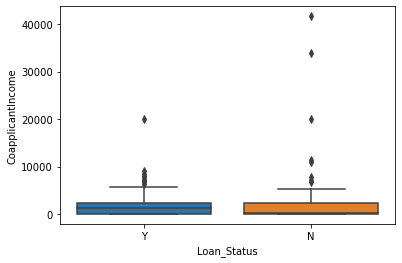

In [32]:
sb.boxplot(A.Loan_Status,A.CoapplicantIncome)

C:\Users\BHUSHAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

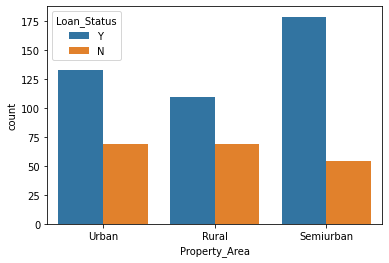

In [29]:
sb.countplot(A.Property_Area,hue=A.Loan_Status)

In [30]:
cat

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

C:\Users\BHUSHAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

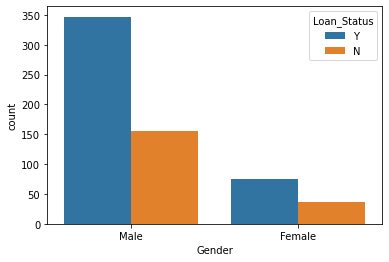

In [31]:
sb.countplot(A.Gender,hue=A.Loan_Status)

C:\Users\BHUSHAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

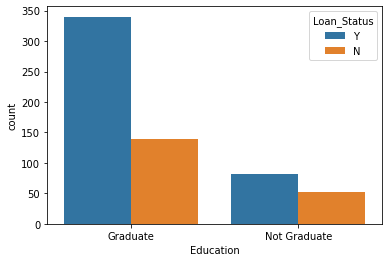

In [32]:
sb.countplot(A.Education,hue=A.Loan_Status)

C:\Users\BHUSHAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

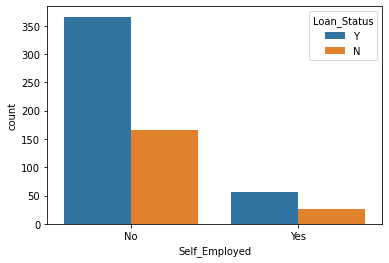

In [33]:
sb.countplot(A.Self_Employed,hue=A.Loan_Status)

<AxesSubplot:>

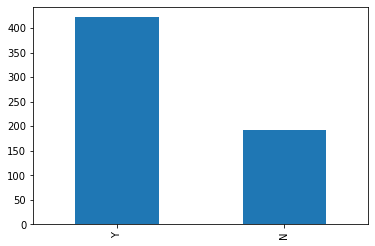

In [34]:
A['Loan_Status'].value_counts().plot(kind="bar")

# Split Data into training & testing set and Create model

In [35]:
Y=A[["Loan_Status"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)

<AxesSubplot:>

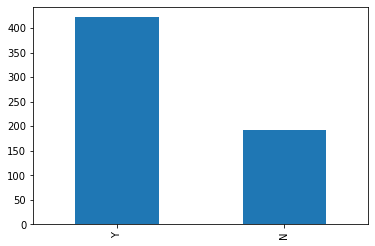

In [36]:
Y["Loan_Status"].value_counts().plot(kind="bar")

<AxesSubplot:>

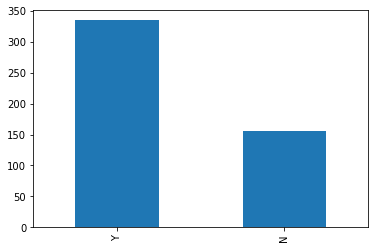

In [37]:
ytrain["Loan_Status"].value_counts().plot(kind="bar")

In [38]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
print("%.4f"%accuracy_score(ytest,pred))

0.8211


In [38]:
X.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [39]:
X=A[con].join(pd.get_dummies(A[cat]))
Y=A[["Loan_Status"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
print("%.4f"%accuracy_score(ytest,pred))

0.8211


In [40]:
#DecisionTreeClassifier
X=A[con].join(pd.get_dummies(A[cat]))
Y=A[["Loan_Status"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=11,max_depth=2)
model=dtc.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
print("%.4f"%accuracy_score(ytest,pred))

0.8211


In [41]:
X=A[con].join(pd.get_dummies(A[cat]))
Y=A[["Loan_Status"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=11,max_leaf_nodes=2)
model=dtc.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
print("%.4f"%accuracy_score(ytest,pred))

0.8211


In [42]:
#RandomForestClassifier
X=A[con].join(pd.get_dummies(A[cat]))
Y=A[["Loan_Status"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=11,max_leaf_nodes=7,n_estimators=10)
model=rfc.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
print("%.4f"%accuracy_score(ytest,pred))

0.8211


<ipython-input-42-7801c75ac2cb>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model=rfc.fit(xtrain,ytrain)


In [34]:
#AdaboostClassifier
X=A[con].join(pd.get_dummies(A[cat]))
Y=A[["Loan_Status"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dtc1=DecisionTreeClassifier(max_depth=2,random_state=14)
adb=AdaBoostClassifier(dtc1,random_state=228,n_estimators=2)
model=adb.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
print("%.4f"%accuracy_score(ytest,pred))

0.8211


C:\Users\BHUSHAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [44]:
#KNN
Y=A[["Loan_Status"]]
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
C=pd.DataFrame(ss.fit_transform(A[con]),columns=con)
X=C.join(pd.get_dummies(A[cat]))
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=5)
model=knc.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
print("%.4f"%accuracy_score(ytest,pred))

<ipython-input-44-3c503c049869>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model=knc.fit(xtrain,ytrain)


0.8211


# Train with entire data on selected algo

In [33]:
#AdaBoostClassifier
X=A[con].join(pd.get_dummies(A[cat]))
Y=A[["Loan_Status"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dtc1=DecisionTreeClassifier(max_depth=2,random_state=14)
adb=AdaBoostClassifier(dtc1,random_state=228,n_estimators=2)
model=adb.fit(X,Y)

C:\Users\BHUSHAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [46]:
Q=pd.read_csv("E:/data science class/may 2021/23 may/testing_set.csv") # Imported Testing Dataset

In [47]:
Q.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [48]:
X.head(2)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849.00000,0.0,146.412162,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
1,1,5405.54085,1508.0,128.000000,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0


In [49]:
Q['Credit_History']=Q['Credit_History'].fillna(1.0)
replacer(Q)

dep = []
for i in Q.Dependents:
    dep.append(int(i.replace("3+","3")))
Q.Dependents=dep

R = Q[con].join(pd.get_dummies(Q[cat]))

In [50]:
pred=model.predict(R) #Performed Prediction

In [51]:
OP=Q[["Loan_ID"]]

In [52]:
OP[["predicted_loan_status"]]=pred

C:\Users\BHUSHAN\anaconda3\lib\site-packages\pandas\core\indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
<ipython-input-52-b7a8ce06434f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OP[["predicted_loan_status"]]=pred
C:\Users\BHUSHAN\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [53]:
OP.head(12) #Predicted Results

,Loan_ID,predicted_loan_status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


# Not eligible for loan

In [54]:
NE=OP[OP.predicted_loan_status=="N"]

In [55]:
NE

,Loan_ID,predicted_loan_status
7,LP001056,N
13,LP001094,N
25,LP001153,N
35,LP001203,N
55,LP001313,N
...,...,...
325,LP002802,N
339,LP002858,N
346,LP002879,N
351,LP002901,N
